<a href="https://colab.research.google.com/github/Dan1053/danfiles/blob/master/TensorflowWk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
print(tf.__version__)


2.3.0


In [12]:
mnist = tf.keras.datasets.mnist

In [13]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


2
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 

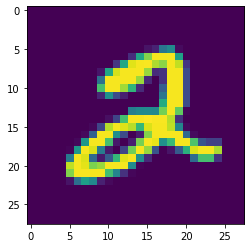

In [14]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[5])
print(training_labels[5])
print(training_images[5])

In [15]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [18]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9909
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179 - accuracy: 0.9948
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0156 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0113 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0087 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0111 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.006

In [21]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9783


[0.09428498893976212, 0.9782999753952026]

In [24]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])


2.3.0
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2002
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0810
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0511
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0376
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0269
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0211
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0160
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0150
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0117
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105


In [25]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2011 - accuracy: 0.9403
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0797 - accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0523 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0379 - accuracy: 0.9878
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9915
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0270 - accuracy: 0.9915
